In [116]:
from sklearn.cluster import KMeans
import pandas as pd
from scipy.cluster.vq import kmeans
from scipy.spatial.distance import cdist,pdist
from sklearn.decomposition import RandomizedPCA
import numpy as np
import scipy.stats as stats

df = pd.read_pickle('../data/relationship_features_forclustering_daily.pandas_df')

df = df[["message_count","compound","word_count","message_count_reciprocity","word_count_reciprocity","response_time","response_time_reciprocity","sentiment_reciprocity"]]

df = df[df["message_count"]!=0]

df_high= pd.read_pickle('../data/relationship_features_high')

df_low = pd.read_pickle('../data/relationship_features_low')

df_high = df_high[["message_count","compound","word_count","message_count_reciprocity","word_count_reciprocity","response_time","response_time_reciprocity","sentiment_reciprocity"]]
df_low = df_low[["message_count","compound","word_count","message_count_reciprocity","word_count_reciprocity","response_time","response_time_reciprocity","sentiment_reciprocity"]]

df.fillna(0,inplace = True)
df_high.fillna(0,inplace = True)
df_low.fillna(0,inplace = True)


In [117]:
df_high['label']=1
df_low['label']=0

label_data = pd.concat([df_high,df_low])

import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split

train, test = train_test_split(label_data, test_size = 0.2)

In [118]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

predictors =["message_count","compound","word_count","message_count_reciprocity","word_count_reciprocity","response_time","response_time_reciprocity","sentiment_reciprocity"]

X_train = train[predictors]
y_train = train["label"]

X_test = test[predictors]
y_test = test["label"]

model = LogisticRegression()
model = model.fit(X_train, y_train)

probs = model.predict_proba(X_test)

In [119]:
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

,0,1
0,message_count,[16.0056248552]
1,compound,[0.00439690692562]
2,word_count,[6.67362164369]
3,message_count_reciprocity,[-0.99848486529]
4,word_count_reciprocity,[1.2233058715]
5,response_time,[-1.55289741225]
6,response_time_reciprocity,[1.83015703725]
7,sentiment_reciprocity,[-0.0456241368966]


In [120]:
# generate class probabilities
predicted = model.predict(X_test)
print predicted

probs = model.predict_proba(X_test)
print probs


[1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 0 0 0 0 0
 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 0 0 0 0 1 1 0 1 1 0 0 1 1 1 0 1 1 0 1 0 1 1
 0 0 1 0 1 0 1 1 0 0 0 1 1 1 0 0 1 1 1 1 1 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0
 0 0 0 1 1 1 1 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1
 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 0 1
 1 0 0 1 0 0 1 1 1 1 1 1 0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 1 0 1 1 1 0 1
 1 1 1 1 1 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 1 0 0 1
 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 0 1 0
 0 1 1 0 1 0 0 1 0 0 1 1 1 1 0 1 1 1 0 0 1 0 0 0 1 1 0 1 1 0 1 0 1 1 1 0 1
 0 1 1 0 0 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 0 1 0
 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 0 0 1 1 0 1 1
 0 0 1 0 0 0 1 1 0 1 0 1 0 0 1 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 1 0 1 0 0 1 1
 1 1 1 1 1 1 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 0 1 1 0 0 0
 1 0 0 0 1 1 0 1 1 0 1 0 

In [121]:
print metrics.accuracy_score(y_test, predicted)
print metrics.roc_auc_score(y_test, probs[:, 1])

0.845991561181
0.934641046527


In [122]:
print metrics.confusion_matrix(y_test, predicted)
print metrics.classification_report(y_test, predicted)

[[398  79]
 [ 67 404]]
             precision    recall  f1-score   support

          0       0.86      0.83      0.85       477
          1       0.84      0.86      0.85       471

avg / total       0.85      0.85      0.85       948



In [123]:
# evaluate the model using 10-fold cross-validation

X = label_data[predictors]
y = label_data["label"]
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print scores
print scores.mean()

[ 0.80379747  0.8628692   0.89240506  0.85654008  0.83966245  0.82067511
  0.8649789   0.8628692   0.83966245  0.80720339]
0.845066330544


In [124]:
output = model.predict_proba(df)
positive =output[:,1]

print positive.mean()

df["output"] = positive


df.to_csv("../data/output_algorithm.csv")



0.491433939974


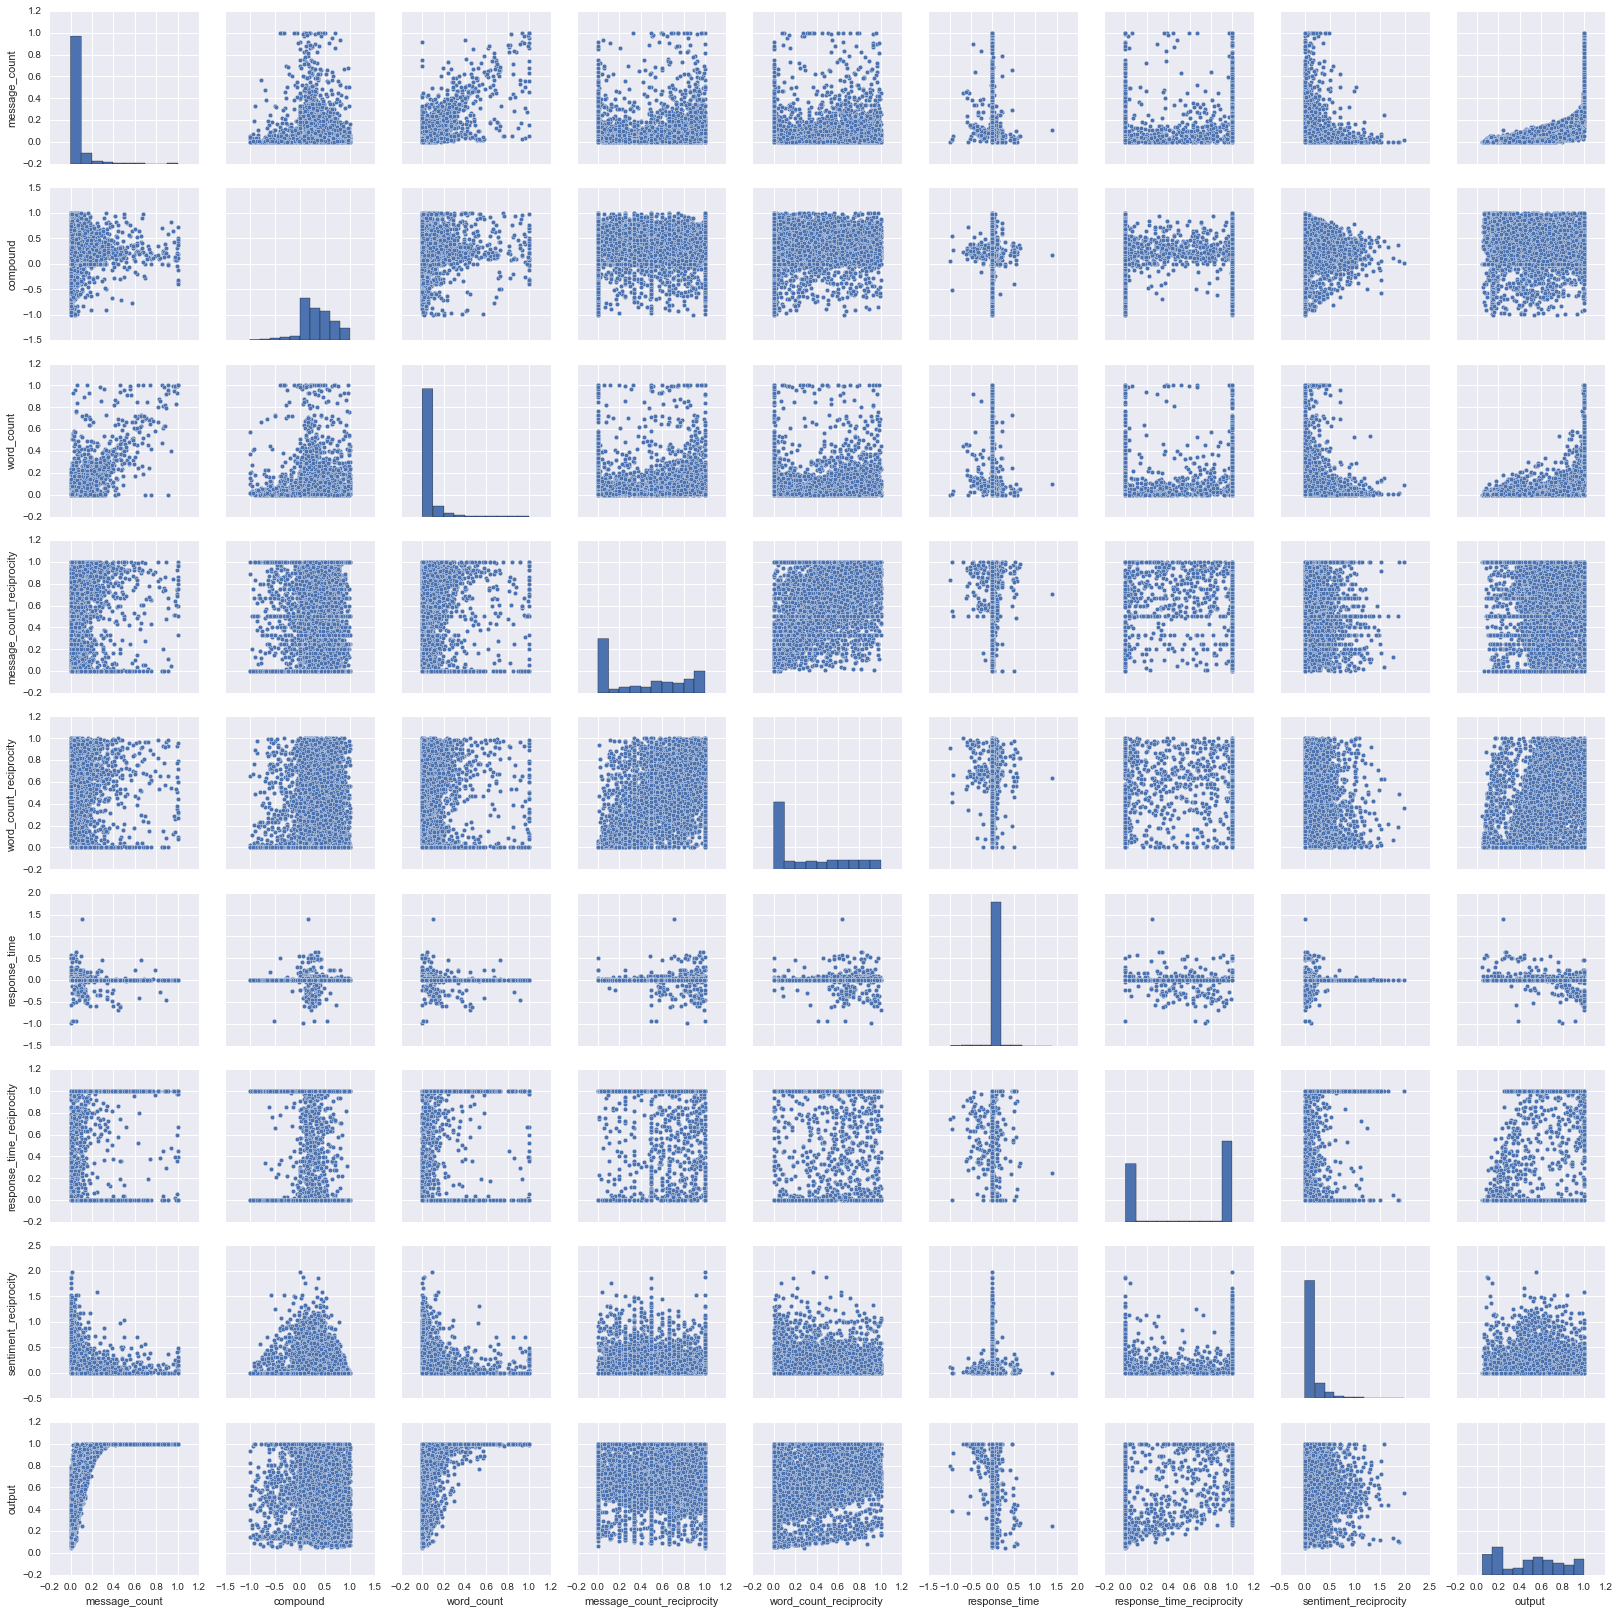

In [125]:
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline  


s = sns.pairplot(df)

In [135]:
#predict for a particular case 

df = pd.read_csv("../data/user_df/data_frame_5389_9785")

df.fillna(0,inplace=True)

df = df[["message_count","compound","word_count","message_count_reciprocity","word_count_reciprocity","response_time","response_time_reciprocity","sentiment_reciprocity"]]


output = model.predict_proba(df)
positive =output[:,1]

print positive.mean()

df["output"] = positive


df

0.69117815693


,message_count,compound,word_count,message_count_reciprocity,word_count_reciprocity,response_time,response_time_reciprocity,sentiment_reciprocity,output
0,0.058573,0.268905,0.061235,0.813187,0.715803,0,1,0.087676,0.802442
1,0.112886,0.249055,0.158586,0.870588,0.644226,0,1,0.040585,0.941465
2,0.066383,0.238619,0.049671,0.731481,0.841828,0,1,0.003625,0.844079
3,0.082002,0.279535,0.064174,0.848000,0.880556,0,1,0.047043,0.877064
4,0.006745,0.256133,0.007536,0.900000,0.691489,0,1,0.109320,0.524043
5,0.034434,0.261359,0.026257,0.672414,0.822368,0,1,0.079799,0.741366
6,0.121761,0.169973,0.115787,0.834225,0.941971,0,1,0.001805,0.954183
7,0.023429,0.323868,0.024551,0.941176,0.442897,0,1,0.072376,0.533353
8,0.102946,0.260716,0.085549,0.895425,0.862745,0,1,0.019555,0.914887
9,0.130635,0.109165,0.139770,0.916667,0.610595,0,1,0.073601,0.945166
